<a href="https://colab.research.google.com/github/jaehyeon1229/Kangnam/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_2%EC%B0%A8_201704240%EC%A0%84%EC%9E%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pylab as plt 
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression

mpl.rc('font',family= 'Malgun Gothic')

#1. 데이터확인 및 전처리#

In [ ]:
# 가까운 미래에 가격이 어떻게 변할지 예측하는 것이 목표
# 가장 많은 매출을 기록하는 것으로 보이는 화장품
shop = pd.read_csv('/content/전국면세점 월별_품목별 매출 현황(2019-01-01_2022-07-31).csv', encoding = 'cp949')
shop.head(10)

,time,화장품,향수,가방류,시계,주류,담배,귀금속류,의류,인홍삼류,안경류,전자제품류,식품류,민예품류,신발류,기타
0,Jan-19,10204,528,1588,976,328,653,838,509,353,211,207,182,18,175,346
1,Feb-19,10813,506,1492,952,252,566,899,409,279,335,221,156,18,173,345
2,Mar-19,14091,622,1657,1018,314,654,930,560,310,402,232,188,22,238,418
3,Apr-19,12223,609,1600,1081,354,632,958,604,314,448,220,190,23,257,434
4,May-19,12545,694,1733,1245,334,628,1041,661,323,461,228,203,29,285,451
5,Jun-19,11582,664,1720,1150,347,629,974,609,293,419,232,202,25,276,450
6,Jul-19,12013,702,1725,1300,331,574,1087,598,295,397,229,204,21,234,438
7,Aug-19,13759,696,1794,1267,347,575,1075,629,296,334,200,208,19,219,427
8,Sep-19,14697,656,1652,1231,349,537,979,736,307,255,170,206,18,233,396
9,Oct-19,14130,643,1620,1223,384,563,966,775,287,241,175,218,18,235,395


In [ ]:
# 결측치 확인
shop.isnull().sum()

time     0
화장품      0
향수       0
가방류      0
시계       0
주류       0
담배       0
귀금속류     0
의류       0
인홍삼류     0
안경류      0
전자제품류    0
식품류      0
민예품류     0
신발류      0
기타       0
dtype: int64

In [ ]:
# 각 열들의 고유값 정보 출력
shop.nunique()

time     43
화장품      43
향수       43
가방류      43
시계       43
주류       38
담배       40
귀금속류     42
의류       43
인홍삼류     35
안경류      42
전자제품류    37
식품류      31
민예품류     16
신발류      39
기타       38
dtype: int64

In [ ]:
#중복 데이터 확인
shop.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

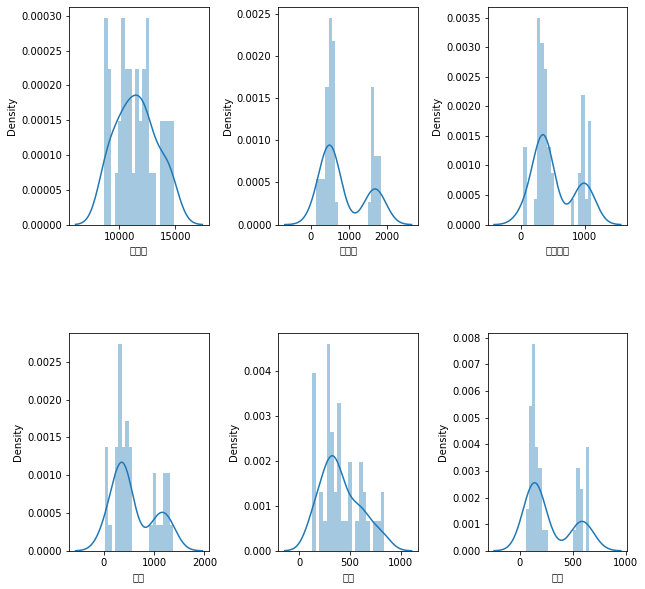

In [ ]:
# corr = shop.drop(columns="기타").corr() # 기타칼럼삭제
# 주력상품 평균 판매량 분포 시각화
plt.figure(1 , figsize = (10 , 10))
n = 0 
for x in ['화장품' , '가방류' , '귀금속류', '시계', '의류', '담배']:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(shop[x] , bins = 20)
plt.show()

In [ ]:
# 주력 판매 제품6개 항목을 데이터셋으로 나누기
shop_prd = shop[['time', '화장품', '가방류', '귀금속류', '시계', '의류', '담배']]
shop_prd = shop_prd.set_index('time')
shop_date = shop[['time']]
X_train, X_test, y_train, y_test = train_test_split(shop_prd, 
                                                    shop_date, 
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

print('원 데이터셋의 shape: ',shop_prd.shape)
print('레이블 데이터셋의 shape: ', shop_date.shape)
print('학습셋의 shape: ', X_train.shape)
print('검증셋의 shape: ', X_test.shape)
print('학습셋 label의 shape: ', y_train.shape)
print('검증셋 label의 shape: ', y_test.shape)

원 데이터셋의 shape:  (43, 6)
레이블 데이터셋의 shape:  (43, 1)
학습셋의 shape:  (32, 6)
검증셋의 shape:  (11, 6)
학습셋 label의 shape:  (32, 1)
검증셋 label의 shape:  (11, 1)


In [ ]:
######## 데이트타임 형태로 변환하기 --------------------------------> 오류 #########
#pd.Timestamp.min
#pd.Timestamp.max
shop_date['time'] = pd.to_datetime(shop_date['time'])  

OutOfBoundsDatetime: ignored

#2. 화장품 및 주요 품목 시각화#

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text

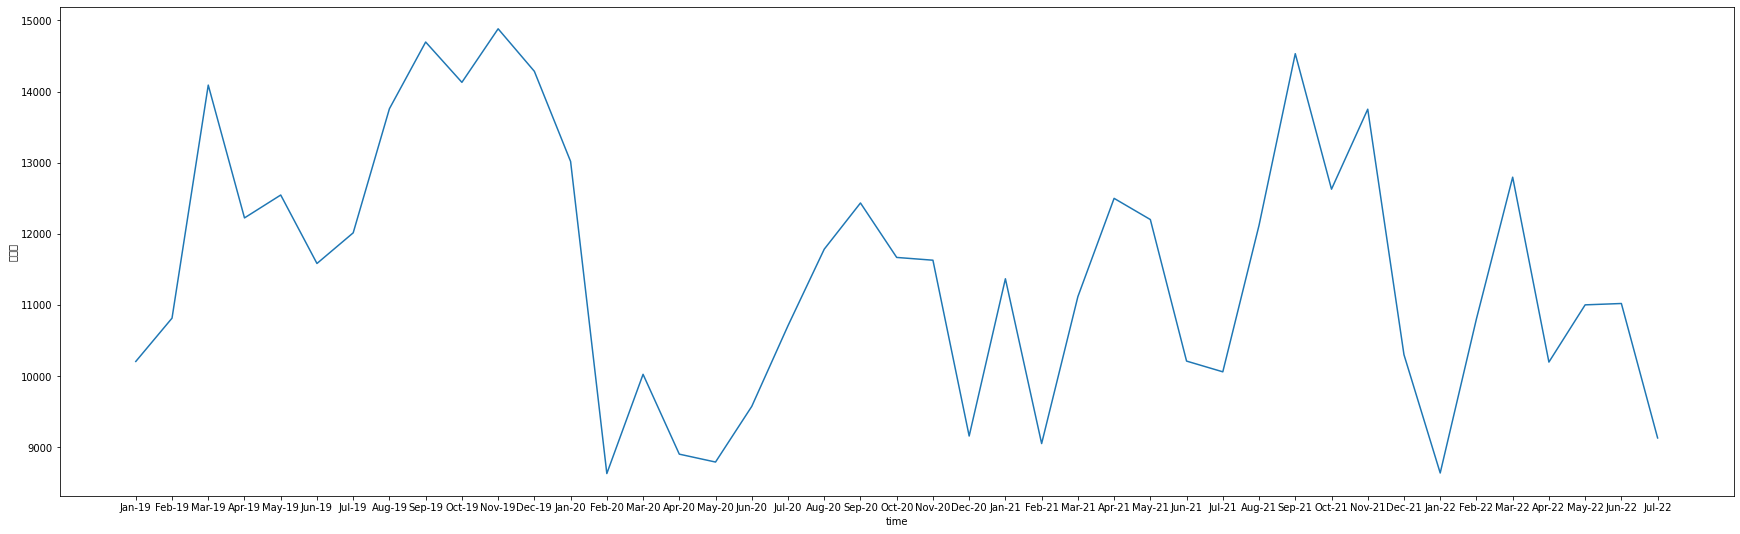

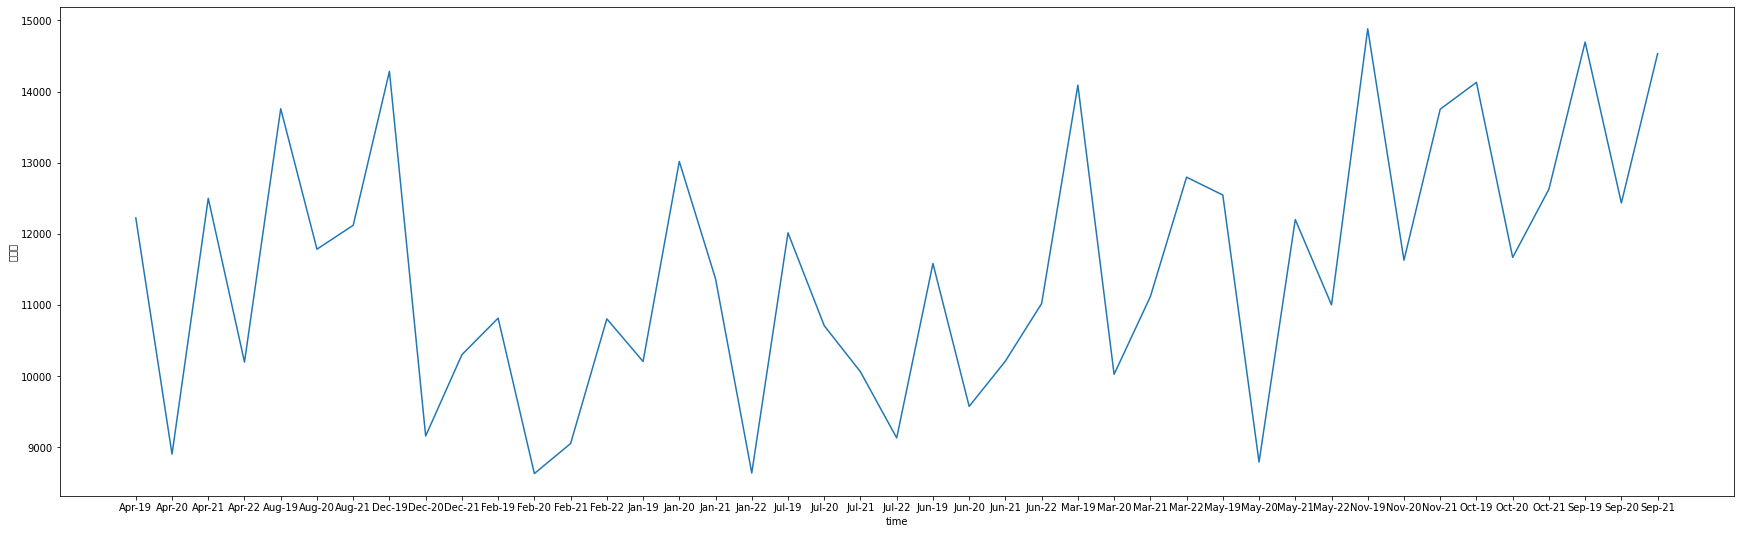

In [ ]:
# 월별 매출량 확인: 화장품
fig = plt.figure(figsize=(30, 9))   # 평균 계산자료 
sns.lineplot(data=shop_prd, x='time', y='화장품')

fig = plt.figure(figsize=(30, 9))
p1 = pd.pivot_table(data=shop_prd,
                    index='time',
                    values='화장품', aggfunc='sum')
sns.lineplot(data=p1, x='time', y='화장품')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text

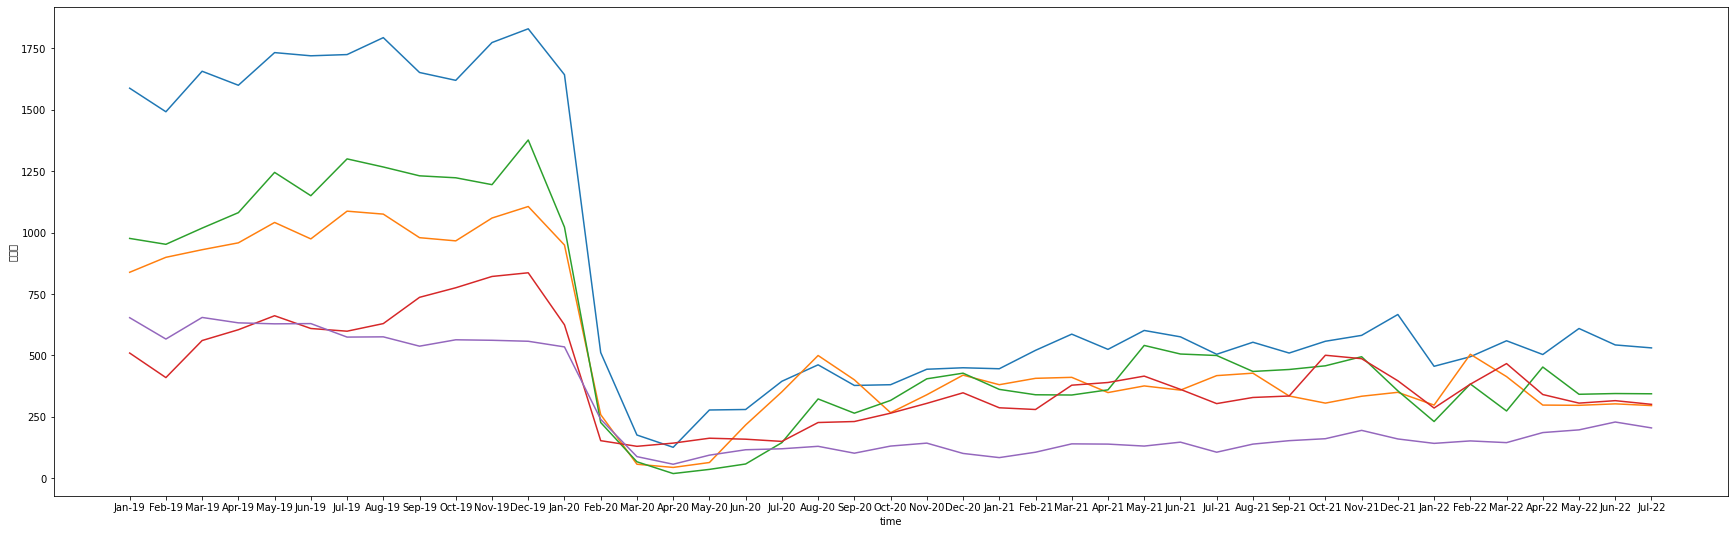

In [ ]:
#  나머지 5품목별 매출량 확인
fig = plt.figure(figsize=(30, 9))
sns.lineplot(data=shop_prd, x='time', y='가방류')
sns.lineplot(data=shop_prd, x='time', y='귀금속류')
sns.lineplot(data=shop_prd, x='time', y='시계')
sns.lineplot(data=shop_prd, x='time', y='의류')
sns.lineplot(data=shop_prd, x='time', y='담배')

#3. 모델링#

##3-1. 아리마 ARIMA 모델 (Auto Regressive Integrated Moving Average Model)##
- 단기예측에 사용하며 계절성을 가진다

AR: 이전의 자료가 현재시점의 데이터에 영향을 주는 자기회귀모델(p), 특정 구간내 데이터간 상관관계(ACF), 과거의 데이터가 지속적으로 영향을 줄 때 쓰는 함수(PACF)

MA: 일정 구간 데이터의 평균을 계산해, 미래를 예측하는 모델

Difference: 차분


In [ ]:
# 화장품 품목만 분류
shop_cos = shop[['time', '화장품']]
shop_cos.head(5)
shop_cos.set_index('time')

In [ ]:
shop.isnull().sum()

In [ ]:
shop_cos2 = shop_cos.fillna(method='ffill')
shop_cos2

###3-2. 시계열 분해###

확인 필요한 부분 3가지

1. 계절성(Seasnality)

2. 트렌드(Trend)

3. 사이클, 불규칙적인 변동(Resdiual)

In [ ]:
# 그래프 사이즈 조절
from pylab import rcParams
rcParams['figure.figsize'] = 13,9

In [ ]:
# 시계열 모델 생성
model_season = tsa.seasonal_decompose(shop_cos, model='additive')
fig = model_season.plot()
plt.show()

ValueError: ignored

###3-3. ARIMA 분석###

In [ ]:
import itertools

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:
for parm in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = tsa.statespace.SARIMAX(shop_cos2, order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    except:
      continue

In [ ]:
# 최적 성능 모델
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [ ]:
ARIMA_list.sort_values(by='AIC').head(2)  # AIC가 가장 낮은 모델을 사용한다.

,Parameter,Seasonal,AIC


In [ ]:
mod = tsa.statespace.SARIMAX(y2,order=(모델1),seasonal_order=(모델2),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())